In [2]:
# 데이터분석
import pandas as pd
import numpy as np 

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc 

import os
import warnings
import random

# ML/DL 모델 및 sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 경고 끄기
warnings.filterwarnings(action='ignore')

# 데이터프레임 제한 풀기
# pd.set_option('display.max_row', 100)
# pd.set_option('display.max_columns', 150)
# pd.set_option('display.max_seq_items', None)

In [239]:
# df = pd.read_csv('data/Samil_label.csv').drop(columns=['Unnamed: 0'])

# df1 = pd.read_csv('kosis_data/경기종합지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df2 = pd.read_csv('kosis_data/경제심리지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df3 = pd.read_csv('kosis_data/국내공급물가지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df4 = pd.read_csv('kosis_data/소비자물가지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df5 = pd.read_csv('kosis_data/수입물가지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df6 = pd.read_csv('kosis_data/수출물가지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df7 = pd.read_csv('kosis_data/식료품_및_에너지제외지수.csv').rename(columns ={'Unnamed: 0' : 'month'})
# df8 = pd.read_csv('kosis_data/주유소_평균_판매가격.csv').rename(columns ={'Unnamed: 0' : 'month'})

samil_df = pd.read_csv('data/Samil_feature_concat.csv').drop(columns=['Unnamed: 0'])

In [208]:
# 날짜 형식 '-'로 맞추기
def replace_month(data):
    data.month = data.month.astype(str).str.replace('.','-')

In [209]:
replace_month(df1)
replace_month(df2)
replace_month(df3)
replace_month(df4)
replace_month(df5)
replace_month(df6)
replace_month(df7)
replace_month(df8)

In [211]:
# 날짜 이상하게 표시된 것 제거
df1.month.iloc[-3:] = df1.month.iloc[-3:].str.replace(' p\)','')

In [216]:
# 다 합해주기

from functools import reduce

dfs = [df, df1, df2, df3, df4, df5, df6, df7, df8] # df, df1, df4, df5, df6, df7, df8
df_merge = reduce(lambda left, right : pd.merge(left, right, on='month',how='outer'), dfs).sort_values('month')

In [231]:
# df_merge = df_merge.drop(df_merge.index[-1])

In [235]:
# df_merge.reset_index().drop(columns=['index']).to_csv('feature.csv')

### 전처리

In [240]:
samil_df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-,-,-,...,60.23,78.87,78.23,62.456,64.697,-,NaN,NaN,NaN,NaN
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-,-,-,...,60.23,78.78,78.23,62.647,64.828,-,NaN,NaN,NaN,NaN
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-,-,-,...,60.23,78.84,78.23,62.962,65.286,-,NaN,NaN,NaN,NaN
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-,-,-,...,60.23,78.87,78.23,62.709,65.352,-,NaN,NaN,NaN,NaN
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-,-,-,...,60.23,78.81,78.23,62.393,65.156,-,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,116.86,109.24,109.24,108.220,105.040,119.26,2084.00,1601.77,-,2089.03
292,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,116.86,121.19,121.19,108.740,105.430,120.23,2029.99,1686.55,-,2084.91
293,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.620,105.760,118.54,1792.19,1639.49,-,1889.31
294,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,NaN,NaN,NaN,NaN,...,116.86,121.19,121.19,108.930,105.710,120.12,1730.00,1620.15,-,1850.20


In [259]:
# 컬럼 공백 제거
samil_df.columns = samil_df.columns.str.strip()

In [307]:
# '-' 값 Nan 값으로 변경
samil_df = samil_df.replace('-', np.nan)

In [260]:
samil_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 610 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    month                          296 non-null    object 
 1    Samil_Close                    274 non-null    float64
 2    Samil_Change                   274 non-null    float64
 3    Kospi_Close                    274 non-null    float64
 4    Kospi_Change                   274 non-null    float64
 5    label                          274 non-null    float64
 6    선행종합지수(2015=100)               272 non-null    float64
 7    재고순환지표(%p)                     272 non-null    object 
 8    경제심리지수                         272 non-null    object 
 9    기계류내수출하지수(선박제외)(2015=100)      272 non-null    object 
 10   건설수주액(실질)(십억원)                 272 non-null    object 
 11   수출입물가비율(2015=100)              272 non-null    object 
 12   코스피(1980.1.4=100)              272

In [308]:
# 앞에 값으로 결측치 처리
samil_df = samil_df.fillna(method='ffill')
samil_df = samil_df.fillna(method='bfill')


In [309]:
samil_df

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.166989,-0.003865,0.0,58.5,-0.4,101.4,88.7,...,60.23,78.87,78.23,62.456,64.697,85.829,1287.02,613.60,606.52,660.99
1,2000-02,0.151669,0.509320,0.150465,-0.006220,0.0,58.7,-0.4,101.4,88.7,...,60.23,78.78,78.23,62.647,64.828,85.829,1287.02,613.60,606.52,660.99
2,2000-03,0.283741,0.872881,0.141921,0.002064,0.0,59.0,-0.4,101.4,88.7,...,60.23,78.84,78.23,62.962,65.286,85.829,1287.02,613.60,606.52,660.99
3,2000-04,0.305151,0.329995,0.107834,-0.008667,1.0,58.8,-0.4,101.4,88.7,...,60.23,78.87,78.23,62.709,65.352,85.829,1287.02,613.60,606.52,660.99
4,2000-05,0.242085,0.337147,0.086009,0.000940,1.0,58.8,-0.4,101.4,88.7,...,60.23,78.81,78.23,62.393,65.156,85.829,1287.02,613.60,606.52,660.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.704787,-0.006930,0.0,129.2,-14.2,105.0,99.7,...,116.86,109.24,109.24,108.220,105.040,119.26,2084.00,1601.77,1357.0,2089.03
292,2022-07,0.122400,0.520008,0.665200,0.002419,1.0,129.4,-15.4,102.3,103.0,...,116.86,121.19,121.19,108.740,105.430,120.23,2029.99,1686.55,1357.0,2084.91
293,2022-08,0.139956,0.425427,0.707168,0.000423,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.620,105.760,118.54,1792.19,1639.49,1357.0,1889.31
294,2022-09,0.113694,0.317581,0.656375,-0.006745,0.0,129.5,-16.1,99.9,105.8,...,116.86,121.19,121.19,108.930,105.710,120.12,1730.00,1620.15,1357.0,1850.20


In [310]:
samil_df.isnull().sum()

month           0
Samil_Close     0
Samil_Change    0
Kospi_Close     0
Kospi_Change    0
               ..
식료품 및 에너지       0
보통휘발유           0
실내등유            0
보일러등유           0
자동차용 경유         0
Length: 610, dtype: int64

In [326]:
df = samil_df

In [327]:
# 월 평균값을 내셨다면 안해도 되는 코드들입니다.
# 데이터프레임에 월별주가평균, 코스피월별평균만 있으면 됩니다.
# 월 평균 값만 남기고 나머지 빈칸 있는 행 삭제
# df = pd.read_csv('data/9_emart주가_월평균.csv')
# df = df.dropna()
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.strftime('%Y-%m')
# df = df.set_index('date')
# df = df.reset_index('date')
'''
# 월 평균값 있을때
df = pd.read_csv('data/10_emart - 주가,코스피원본.csv')
df.date = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%Y-%m')
df = df.set_index('date')
'''

# MinMaxScaler 데이터 정규화
scaler = MinMaxScaler()
df = df.set_index('month')
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)

df = df.reset_index()
df_scaled.insert(0,'month', df['month'] )

df_scaled
# df = df.merge(df_scaled,how='left')
# df.head()

,month,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
0,2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,...,0.0,0.124353,0.083618,0.001354,0.000000,0.000000,0.077708,0.095603,0.107626,0.050417
1,2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,...,0.0,0.122491,0.083618,0.005458,0.003190,0.000000,0.077708,0.095603,0.107626,0.050417
2,2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,...,0.0,0.123733,0.083618,0.012227,0.014344,0.000000,0.077708,0.095603,0.107626,0.050417
3,2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,...,0.0,0.124353,0.083618,0.006790,0.015951,0.000000,0.077708,0.095603,0.107626,0.050417
4,2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,...,0.0,0.123112,0.083618,0.000000,0.011178,0.000000,0.077708,0.095603,0.107626,0.050417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,...,1.0,0.752742,0.745094,0.984743,0.982466,0.971803,1.000000,0.928538,0.822539,1.000000
292,2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,...,1.0,1.000000,1.000000,0.995917,0.991964,1.000000,0.937498,1.000000,0.822539,0.997260
293,2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,...,1.0,1.000000,1.000000,0.993339,1.000000,0.950874,0.662308,0.960333,0.822539,0.867195
294,2022-09,0.113694,0.317581,0.664041,0.174894,0.0,1.000000,0.154676,0.682975,0.687339,...,1.0,1.000000,1.000000,1.000000,0.998782,0.996802,0.590339,0.944031,0.822539,0.841189


In [371]:
a = 50
df_scaled_ = df_scaled[:a]

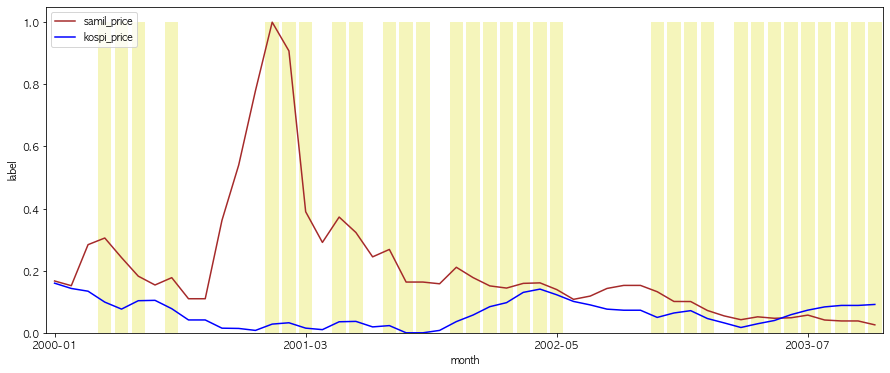

In [382]:
data = df_scaled_

# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 15))

plt.show()

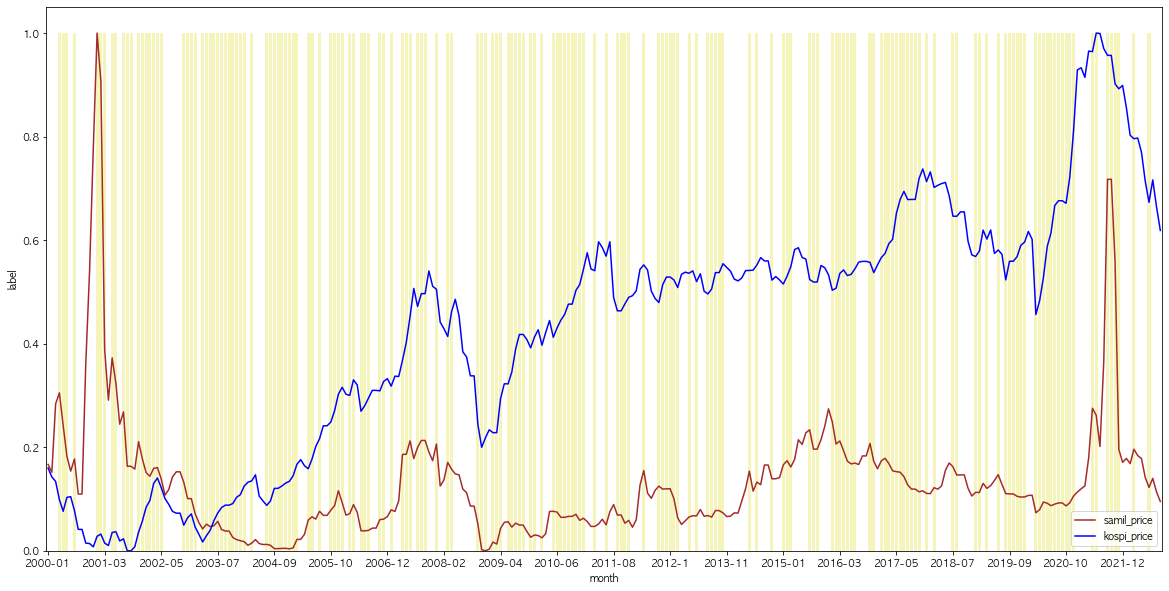

'\n# 주가 데이터 그래프\nplt.figure(figsize=(15, 6))\nplt.rcParams[\'font.family\'] = \'AppleGothic\'\n\nsns.lineplot(data=df, x="date", y="k_s - p_s", label=\'하락정도\')\nsns.scatterplot(data=df, x="date", y="downturn", label=\'주가하락세\')\nsns.lineplot(data=df, x="date", y="pricemm", label=\'price_minmax\')\nsns.lineplot(data=df, x="date", y="kospimm", label=\'kospi_minmax\')\n\nplt.ylabel(\'\')\nplt.xticks(rotation=45)\n\nplt.show()\n'

In [384]:
# 주가 데이터 그래프

data = df_scaled

plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'AppleGothic'

# plt.subplot(2, 1, 1)
# plt.axhline(y=0, color='black', linewidth=1)
ax = sns.lineplot(data=data, x="month", y='Samil_Close', label='samil_price', color='brown')
ax = sns.lineplot(data=data, x="month", y='Kospi_Close', label='kospi_price', color='blue')
ax = sns.barplot(data=data, x="month", y="label", label='↓', color = 'yellow', alpha  = 0.3)

'''
plt.subplot(2, 1, 1)
plt.figure(figsize=(20, 10))
plt.axhline(y=0, color='r', linewidth=1)
sns.lineplot(data=data3, x="Date", y='Kospi_Change', label='kospi_change', color='orange')
sns.lineplot(data=data3, x='Date', y='CJ_Change', label='cj_change', color='skyBlue')
'''

total_len = len(data.index)
ax.set_xticks(np.arange(0, total_len + 1, 15))

plt.show()


'''
# 주가 데이터 그래프
plt.figure(figsize=(15, 6))
plt.rcParams['font.family'] = 'AppleGothic'

sns.lineplot(data=df, x="date", y="k_s - p_s", label='하락정도')
sns.scatterplot(data=df, x="date", y="downturn", label='주가하락세')
sns.lineplot(data=df, x="date", y="pricemm", label='price_minmax')
sns.lineplot(data=df, x="date", y="kospimm", label='kospi_minmax')

plt.ylabel('')
plt.xticks(rotation=45)

plt.show()
'''

In [ ]:
df.to_csv('yvalue.csv',index=False)

- 저장해서 액셀로 켜시고 https://docs.google.com/spreadsheets/d/1fgvvsrypJKAZEljnHw-BNQsWu9WNRNBAtiMUwEad9Sc/edit#gid=1221057598 이 파일을 복사해서 각 시트에 y값('downturn'열)을 만든 데이터로 대체하시면 됩니다.
- downturn이 target(y값) feature입니다. 이것만 date 열 오른쪽에 남기고, 그 오른쪽에 필요한 feature를 추가하면 됩니다.
- 카테고리별로 시트를 나눠놨으니 그 시트에 바로 복붙하세요

### feature importance로 feature selection

In [340]:
df = df_scaled.set_index('month')

In [341]:
df

,Samil_Close,Samil_Change,Kospi_Close,Kospi_Change,label,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),건설수주액(실질)(십억원),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
month,,,,,,,,,,,,,,,,,,,,,
2000-01,0.166849,0.466341,0.159749,0.307588,0.0,0.031378,0.437050,0.712329,0.245478,0.222511,...,0.0,0.124353,0.083618,0.001354,0.000000,0.000000,0.077708,0.095603,0.107626,0.050417
2000-02,0.151669,0.509320,0.142720,0.199083,0.0,0.034106,0.437050,0.712329,0.245478,0.222511,...,0.0,0.122491,0.083618,0.005458,0.003190,0.000000,0.077708,0.095603,0.107626,0.050417
2000-03,0.283741,0.872881,0.133917,0.580746,0.0,0.038199,0.437050,0.712329,0.245478,0.222511,...,0.0,0.123733,0.083618,0.012227,0.014344,0.000000,0.077708,0.095603,0.107626,0.050417
2000-04,0.305151,0.329995,0.098791,0.086354,1.0,0.035471,0.437050,0.712329,0.245478,0.222511,...,0.0,0.124353,0.083618,0.006790,0.015951,0.000000,0.077708,0.095603,0.107626,0.050417
2000-05,0.242085,0.337147,0.076302,0.528975,1.0,0.035471,0.437050,0.712329,0.245478,0.222511,...,0.0,0.123112,0.083618,0.000000,0.011178,0.000000,0.077708,0.095603,0.107626,0.050417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,0.141677,0.283132,0.713928,0.166370,0.0,0.995907,0.188849,0.782779,0.529716,0.862189,...,1.0,0.752742,0.745094,0.984743,0.982466,0.971803,1.000000,0.928538,0.822539,1.000000
2022-07,0.122400,0.520008,0.673135,0.597121,1.0,0.998636,0.167266,0.729941,0.614987,1.000000,...,1.0,1.000000,1.000000,0.995917,0.991964,1.000000,0.937498,1.000000,0.822539,0.997260
2022-08,0.139956,0.425427,0.716381,0.505142,0.0,1.000000,0.154676,0.682975,0.687339,0.933958,...,1.0,1.000000,1.000000,0.993339,1.000000,0.950874,0.662308,0.960333,0.822539,0.867195


In [347]:
df.iloc[:,5:]

,선행종합지수(2015=100),재고순환지표(%p),경제심리지수,기계류내수출하지수(선박제외)(2015=100),건설수주액(실질)(십억원),수출입물가비율(2015=100),코스피(1980.1.4=100),장단기금리차(%p),동행종합지수(2015=100),광공업생산지수(2015=100),...,기타가구 (2015=100)_y,기타제조업제품 (2015=100)_y,기타제조업제품 (2015=100),총지수,식료품 및 에너지제외 지수,식료품 및 에너지,보통휘발유,실내등유,보일러등유,자동차용 경유
month,,,,,,,,,,,,,,,,,,,,,
2000-01,0.031378,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.000000,0.000000,...,0.0,0.124353,0.083618,0.001354,0.000000,0.000000,0.077708,0.095603,0.107626,0.050417
2000-02,0.034106,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.004237,0.000000,...,0.0,0.122491,0.083618,0.005458,0.003190,0.000000,0.077708,0.095603,0.107626,0.050417
2000-03,0.038199,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.009887,0.000000,...,0.0,0.123733,0.083618,0.012227,0.014344,0.000000,0.077708,0.095603,0.107626,0.050417
2000-04,0.035471,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.016949,0.000000,...,0.0,0.124353,0.083618,0.006790,0.015951,0.000000,0.077708,0.095603,0.107626,0.050417
2000-05,0.035471,0.437050,0.712329,0.245478,0.222511,0.950000,0.010843,0.393651,0.024011,0.000000,...,0.0,0.123112,0.083618,0.000000,0.011178,0.000000,0.077708,0.095603,0.107626,0.050417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,0.995907,0.188849,0.782779,0.529716,0.862189,0.030882,0.762839,0.657143,0.975989,0.970814,...,1.0,0.752742,0.745094,0.984743,0.982466,0.971803,1.000000,0.928538,0.822539,1.000000
2022-07,0.998636,0.167266,0.729941,0.614987,1.000000,0.030882,0.720105,0.603175,0.987288,0.975422,...,1.0,1.000000,1.000000,0.995917,0.991964,1.000000,0.937498,1.000000,0.822539,0.997260
2022-08,1.000000,0.154676,0.682975,0.687339,0.933958,0.032353,0.701431,0.533333,1.000000,0.966206,...,1.0,1.000000,1.000000,0.993339,1.000000,0.950874,0.662308,0.960333,0.822539,0.867195


(236, 604)
(60, 604)
1.0    0.605932
0.0    0.394068
Name: label, dtype: float64
1.0    0.516667
0.0    0.483333
Name: label, dtype: float64
정확도 :  0.6333333333333333
비누,세제및치약 (2015=100)            0.325523
합성고무 (2015=100)_x              0.188860
섬유및가죽제품 (2015=100)_y           0.172113
철강1차제품 (2015=100)_y            0.136373
연및아연제련,정련및합금제품 (2015=100)_x    0.121630
반도체제조용기계 (2015=100)_x          0.055502
종이류 (2015=100)_y               0.000000
가죽 (2015=100)_y                0.000000
가방및핸드백 (2016.12=100)           0.000000
신발 (2015=100)_y                0.000000
dtype: float64


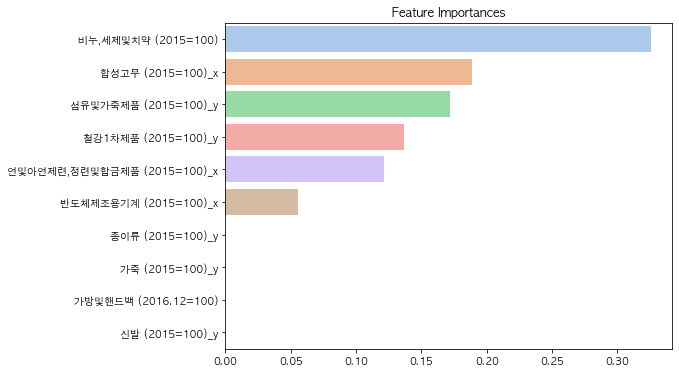

In [389]:
'''
# 데이터 불러오기 및 날짜 인덱스 지정
df = pd.read_csv('data/10_emart - 동행&후행.csv') # 파일 경로를 수정해주세요
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.drop(['k_s - p_s'], axis=1)
'''

from sklearn.tree import DecisionTreeClassifier

# train, test split (8:2)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,5:], df['label'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

# 0,1이 고르게 나누어졌을까?
print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델 학습
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
print('정확도 : ', accuracy_score(y_pred, y_test))

# feature importance 확인
ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Feature Importances') # 그래프 제목을 변경해주세요
sns.barplot(x=ftr_top5, y=ftr_top5.index, palette='pastel')
print(ftr_top5)
plt.show()

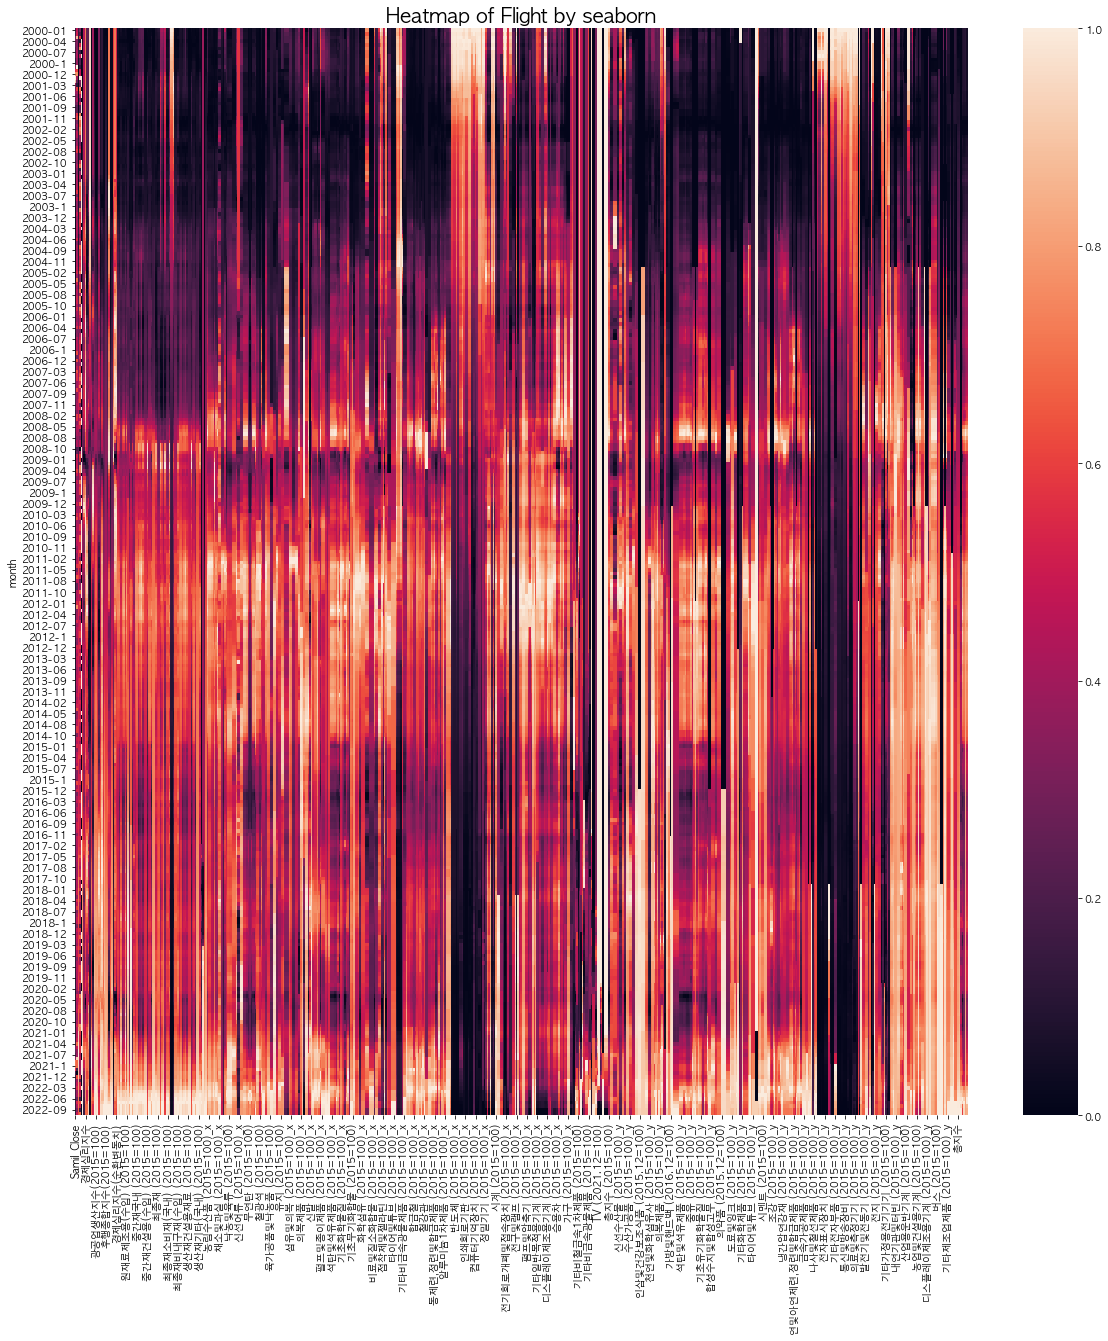

In [359]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df)
plt.title('Heatmap of Flight by seaborn', fontsize=20)
plt.show()


- 이런 식으로 상위에 뜬 feature만 selection해서 새로운 데이터 프레임을 만듭니다(액셀 작업 추천)
- accuracy가 0.7 이 넘는 데이터에서 나온 feature를 넣는게 좋았던 것 같습니다.

(44, 13)
(12, 13)
1    0.659091
0    0.340909
Name: downturn, dtype: float64
0    0.5
1    0.5
Name: downturn, dtype: float64
정확도 :  0.8333333333333334


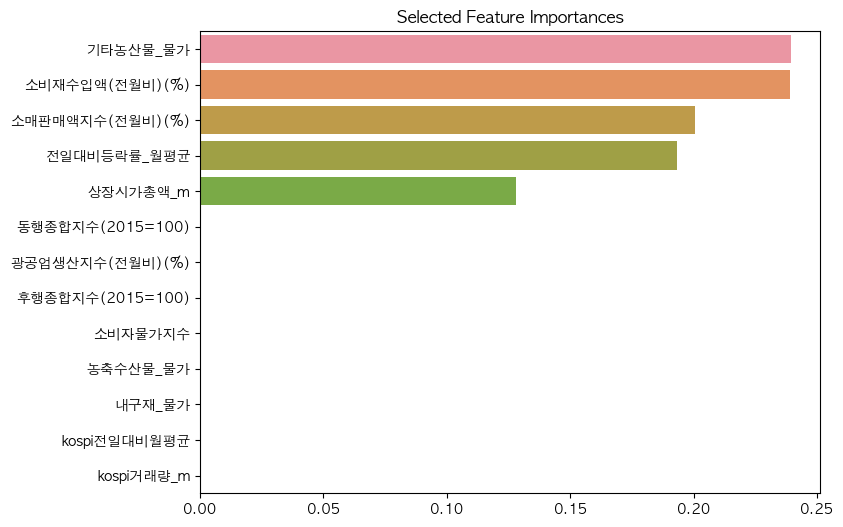

In [17]:
# 데이터 불러오기 및 날짜 인덱스 지정
df = pd.read_csv('data/10_emart - selection.csv')
df.date = pd.to_datetime(df.date)
df = df.set_index('date')
df = df.drop(['k_s - p_s'], axis=1)

from sklearn.tree import DecisionTreeClassifier

# train, test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['downturn'], test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print(X_test.shape)

print(y_train.value_counts()/train_cnt)
print(y_test.value_counts()/test_cnt)

# CART 모델
model = DecisionTreeClassifier(max_depth=4, random_state=1)
model.fit(X_train, y_train)
# model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('정확도 : ',accuracy_score(y_pred, y_test))

ftr_importances = pd.Series(model.feature_importances_, index = X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title('Selected Feature Importances')
sns.barplot(x=ftr_top5, y=ftr_top5.index)
plt.show()

#### 하락 팩터 찾기

In [ ]:
## feature selection된 데이터 MinMaxScaling

# 데이터 불러오기 및 날짜 인덱스 지정
df_apr_f = pd.read_csv('data/9_에이피알 - features.csv')
df_apr_f.date = pd.to_datetime(df_apr_f.date)
df_apr_f = df_apr_f.ffill()
# df = df_apr_f.drop(['생산자제품재고지수','신선어개류 물가'], axis=1)
# df_onlyfeat = df_apr_f.drop(['emart_close', 'kospi_close', 'emartMinMax', 'kospiMinMax', 'k-p_diff', 'k_p10'], axis=1)
df_apr_f = df_apr_f.set_index('date')
df_apr_ff = df_apr_f.drop('소비자 거래지수', axis=1)

# MinMaxScaler로 price, kospi 데이터 정규화
scaler = MinMaxScaler()
scaler.fit(df_apr_ff)
scaled = scaler.transform(df_apr_ff)
df_scaled = pd.DataFrame(scaled, columns=['생산자제품재고지수(전월비)(%)','신선어개','트래픽','소비자 거래건수'])

# 정규화한 데이터에 날짜 열 추가
# df_onlyfeat = df_onlyfeat.reset_index()
df_scaled.insert(0,'date', df['date'] )

# 원본데이터에 merge
df_apr_f = df_apr_f.drop(df_apr_f.iloc[:,:4], axis=1)
df_apr_f = df_apr_f.reset_index()
df_apr_f = df_apr_f.merge(df_scaled, how='left')

df_apr_f = df.merge(df_apr_f, how='left')

df_apr_f.head()